<a href="https://colab.research.google.com/github/Morshed-Alam/Sussex-Huawei-Locomotion-Challenge-2021/blob/main/shl_data_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Dataset Exploration

## Function for display output side by side
Don't work on google colab but work on jupyter notebook

In [ ]:
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

## Text file modification function

In [ ]:
def modify_txt_file(path, col_no_to_remain, has_new_line, delimiter=';'):
    mod_lines = []
    with open(path) as f:
         lines = f.readlines()

    for line in lines:
         l = line.split(delimiter)
         mod_lines.append(l[0] + ";" + l[col_no_to_remain] + has_new_line)

    with open(path.split('.')[0] + "_mod.txt", mode='w') as f:
         f.writelines(mod_lines)

## Data Loading and Organization

In [ ]:
!rm -r /content/*
!mkdir train valid test

In [ ]:
!curl -o /content/train/SHL-2021-Train.zip http://www.shl-dataset.org/wp-content/uploads/SHLChallenge2021/SHL-2021-Train.zip
!curl -o /content/valid/SHL-2021-Validate.zip http://www.shl-dataset.org/wp-content/uploads/SHLChallenge2021/SHL-2021-Validate.zip
!curl -o /content/test/SHL-2021-Test.zip http://www.shl-dataset.org/wp-content/uploads/SHLChallenge2021/SHL-2021-Test.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 83.1M  100 83.1M    0     0  8235k      0  0:00:10  0:00:10 --:--:-- 8065k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 9035k  100 9035k    0     0  6266k      0  0:00:01  0:00:01 --:--:-- 6261k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 45.6M  100 45.6M    0     0  8892k      0  0:00:05  0:00:05 --:--:-- 9558k


In [ ]:
import zipfile
import os
from tqdm import notebook as tqdm
def un_zipFiles(path):
    files=os.listdir(path)
    for file in tqdm.tqdm(files):
        if file.endswith('.zip'):
            filePath=path+'/'+file
            zip_file = zipfile.ZipFile(filePath)
            for names in zip_file.namelist():
                zip_file.extract(names,path)
            zip_file.close()

In [ ]:
un_zipFiles('/content/train')
un_zipFiles('/content/valid')
un_zipFiles('/content/test')
!rm /content/train/SHL-2021-Train.zip /content/valid/SHL-2021-Validate.zip /content/test/SHL-2021-Test.zip

## Location Data

In [ ]:
import pandas as pd

location_train = pd.read_csv('/content/train/Location.txt', header=None, delimiter=' ', names=['Epoch Time', 'Ignore1', 'Ignore2','Accuracy', 'Latitude', 'Longitude', 'Altitude'])
location_valid = pd.read_csv('/content/valid/Location.txt', header=None, delimiter=' ', names=['Epoch Time', 'Ignore1', 'Ignore2','Accuracy', 'Latitude', 'Longitude', 'Altitude'])
location_test = pd.read_csv('/content/test/Location.txt', header=None, delimiter=' ', names=['Epoch Time', 'Ignore1', 'Ignore2','Accuracy', 'Latitude', 'Longitude', 'Altitude'])
location_train = location_train[['Epoch Time','Accuracy', 'Latitude', 'Longitude', 'Altitude']]
location_valid = location_valid[['Epoch Time','Accuracy', 'Latitude', 'Longitude', 'Altitude']]
location_test = location_test[['Epoch Time','Accuracy', 'Latitude', 'Longitude', 'Altitude']]
location_train['Epoch Time'] = pd.to_datetime(location_train['Epoch Time'], unit='ms').astype('datetime64[s]')
location_valid['Epoch Time'] = pd.to_datetime(location_valid['Epoch Time'], unit='ms').astype('datetime64[s]')
location_test['Epoch Time'] = pd.to_datetime(location_test['Epoch Time'], unit='ms').astype('datetime64[s]')
location = pd.concat([location_train, location_valid, location_test], axis=0)

In [ ]:
print("Size of location_train: ", location_train.shape)
print("Size of location_valid: ", location_valid.shape)
print("Size of location_test: ", location_test.shape)
print('Size of location: ', location.shape)

Size of location_train:  (911109, 5)
Size of location_valid:  (101524, 5)
Size of location_test:  (562565, 5)
Size of location:  (1575198, 5)


In [ ]:
display_side_by_side(location_train.head(), location_valid.head(), location_test.head(), titles=['location_train', 'location_valid', 'location_test'])

,Epoch Time,Accuracy,Latitude,Longitude,Altitude
0,2017-03-25 08:47:38,64.0,50.844494,-0.132922,97.664610
1,2017-03-25 08:47:39,48.0,50.844491,-0.132924,128.267900
2,2017-03-25 08:47:40,48.0,50.844481,-0.132931,135.611425
3,2017-03-25 08:47:41,12.0,50.844469,-0.132930,134.436050
4,2017-03-25 08:47:42,32.0,50.844267,-0.132787,135.993866
,Epoch Time,Accuracy,Latitude,Longitude,Altitude
0,2017-06-14 07:48:23,96.0,50.826394,-0.119515,248.937172
1,2017-06-14 07:48:25,128.0,50.826394,-0.119528,129.362557
2,2017-06-14 07:48:26,96.0,50.826394,-0.119551,130.095681
3,2017-06-14 07:48:27,128.0,50.826396,-0.119589,130.184470


In [ ]:
# Number of NaNs for each object
location.isnull().sum(axis=1).head(15)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

In [ ]:
# Number of NaNs for each column
location.isnull().sum(axis=0).head()

Epoch Time    0
Accuracy      0
Latitude      0
Longitude     0
Altitude      0
dtype: int64

Location data have no NaN data

## GPS Data

In [ ]:
modify_txt_file('/content/train/GPS.txt', col_no_to_remain=-1, has_new_line="", delimiter=' ')
modify_txt_file('/content/valid/GPS.txt', col_no_to_remain=-1, has_new_line="", delimiter=' ')
modify_txt_file('/content/test/GPS.txt', col_no_to_remain=-1, has_new_line="", delimiter=' ')

In [ ]:
gps_train = pd.read_csv('/content/train/GPS_mod.txt', header=None, delimiter=';', names=['Epoch Time', 'nsatellite'])
gps_valid = pd.read_csv('/content/valid/GPS_mod.txt', header=None, delimiter=';', names=['Epoch Time', 'nsatellite'])
gps_test = pd.read_csv('/content/test/GPS_mod.txt', header=None, delimiter=';', names=['Epoch Time', 'nsatellite'])
gps_train['Epoch Time'] = pd.to_datetime(gps_train['Epoch Time'], unit='ms').astype('datetime64[s]')
gps_valid['Epoch Time'] = pd.to_datetime(gps_valid['Epoch Time'], unit='ms').astype('datetime64[s]')
gps_test['Epoch Time'] = pd.to_datetime(gps_test['Epoch Time'], unit='ms').astype('datetime64[s]')
gps = pd.concat([gps_train, gps_valid, gps_test], axis=0)

In [ ]:
print('Size of gps_train: ', gps_train.shape)
print('Size of gps_valid: ', gps_valid.shape)
print('Size of gps_test: ', gps_test.shape)
print('Size of gps: ', gps.shape)

Size of gps_train:  (1322749, 2)
Size of gps_valid:  (157348, 2)
Size of gps_test:  (781773, 2)
Size of gps:  (2261870, 2)


In [ ]:
display_side_by_side(gps_train.head(), gps_valid.head(), gps_test.head(), titles=['gps_training', 'gps_valid', 'gps_test'])

,Epoch Time,nsatellite
0,2017-03-25 08:35:24,2
1,2017-03-25 08:35:25,2
2,2017-03-25 08:35:26,2
3,2017-03-25 08:35:27,2
4,2017-03-25 08:35:28,2
,Epoch Time,nsatellite
0,2017-06-14 07:48:16,0
1,2017-06-14 07:48:17,0
2,2017-06-14 07:48:17,1
3,2017-06-14 07:48:18,2


In [ ]:
# Number of NaNs for each object
gps.isnull().sum(axis=1).head(15)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

In [ ]:
# Number of NaNs for each column
gps.isnull().sum(axis=0).head()

Epoch Time    0
nsatellite    0
dtype: int64

GPS data have no NaN

## WiFi Data

In [ ]:
modify_txt_file('/content/train/WiFi.txt', col_no_to_remain=3, has_new_line='\n')
modify_txt_file('/content/valid/WiFi.txt', col_no_to_remain=3, has_new_line='\n')
modify_txt_file('/content/test/WiFi.txt', col_no_to_remain=3, has_new_line='\n')

In [ ]:
wifi_train = pd.read_csv('/content/train/WiFi_mod.txt', header=None, delimiter=';', names=['Epoch Time', 'nwifi'])
wifi_valid = pd.read_csv('/content/valid/WiFi_mod.txt', header=None, delimiter=';', names=['Epoch Time', 'nwifi'])
wifi_test = pd.read_csv('/content/test/WiFi_mod.txt', header=None, delimiter=';', names=['Epoch Time', 'nwifi'])
wifi_train['Epoch Time'] = pd.to_datetime(wifi_train['Epoch Time'], unit='ms').astype('datetime64[s]')
wifi_valid['Epoch Time'] = pd.to_datetime(wifi_valid['Epoch Time'], unit='ms').astype('datetime64[s]')
wifi_test['Epoch Time'] = pd.to_datetime(wifi_test['Epoch Time'], unit='ms').astype('datetime64[s]')
wifi = pd.concat([wifi_train, wifi_valid, wifi_test], axis=0)

In [ ]:
print('Size of wifi_tarin: ', wifi_train.shape)
print('Size of wifi_valid: ', wifi_valid.shape)
print('Size of wifi_test: ', wifi_test.shape)
print('Size of wifi: ', wifi.shape)

Size of wifi_tarin:  (1459351, 2)
Size of wifi_valid:  (158681, 2)
Size of wifi_test:  (771855, 2)
Size of wifi:  (2389887, 2)


In [ ]:
display_side_by_side(wifi_train.head(), wifi_valid.head(), wifi_test.head(), titles=['wifi_train', 'wifi_valid', 'wifi_test'])

,Epoch Time,nwifi
0,2017-03-25 08:35:23,10
1,2017-03-25 08:35:24,10
2,2017-03-25 08:35:25,10
3,2017-03-25 08:35:26,10
4,2017-03-25 08:35:27,10
,Epoch Time,nwifi
0,2017-06-14 07:48:15,11
1,2017-06-14 07:48:16,11
2,2017-06-14 07:48:17,11
3,2017-06-14 07:48:18,11


In [ ]:
# Number of NaNs for each object
wifi.isnull().sum(axis=1).head(15)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

In [ ]:
# Number of NaNs for each column
wifi.isnull().sum(axis=0).head()

Epoch Time    0
nwifi         0
dtype: int64

WiFi data have no NaN

## Cell Data

In [ ]:
modify_txt_file('/content/train/Cells.txt', col_no_to_remain=3, has_new_line='\n', delimiter=' ')
modify_txt_file('/content/valid/Cells.txt', col_no_to_remain=3, has_new_line='\n', delimiter=' ')
modify_txt_file('/content/test/Cells.txt', col_no_to_remain=3, has_new_line='\n', delimiter=' ')

In [ ]:
cell_train = pd.read_csv('/content/train/Cells_mod.txt', header=None, delimiter=';', names=['Epoch Time', 'ncell'])
cell_valid = pd.read_csv('/content/valid/Cells_mod.txt', header=None, delimiter=';', names=['Epoch Time', 'ncell'])
cell_test = pd.read_csv('/content/test/Cells_mod.txt', header=None, delimiter=';', names=['Epoch Time', 'ncell'])
cell_train['Epoch Time'] = pd.to_datetime(cell_train['Epoch Time'], unit='ms').astype('datetime64[s]')
cell_valid['Epoch Time'] = pd.to_datetime(cell_valid['Epoch Time'], unit='ms').astype('datetime64[s]')
cell_test['Epoch Time'] = pd.to_datetime(cell_test['Epoch Time'], unit='ms').astype('datetime64[s]')
cell = pd.concat([cell_train, cell_valid, cell_test], axis=0)

In [ ]:
print('Size cell_train: ', cell_train.shape)
print('Size cell_valid: ', cell_valid.shape)
print('Size cell_test: ', cell_test.shape)
print('Size of cell: ', cell.shape)

Size cell_train:  (1324881, 2)
Size cell_valid:  (126333, 2)
Size cell_test:  (561369, 2)
Size of cell:  (2012583, 2)


In [ ]:
display_side_by_side(cell_train.head(), cell_valid.head(), cell_test.head(), titles=['cell_train', 'cell_valid', 'cell_test'])

,Epoch Time,ncell
0,2017-03-25 08:35:23,3
1,2017-03-25 08:35:23,3
2,2017-03-25 08:35:47,13
3,2017-03-25 08:35:53,3
4,2017-03-25 08:35:58,3
,Epoch Time,ncell
0,2017-06-14 07:48:15,4
1,2017-06-14 07:48:15,4
2,2017-06-14 07:48:19,1
3,2017-06-14 07:48:25,4


In [ ]:
# Number of NaNs for each object
cell.isnull().sum(axis=1).head(15)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

In [ ]:
# Number of NaNs for each column
cell.isnull().sum(axis=0).head()

Epoch Time    0
ncell         0
dtype: int64

Cell data have no NaN

## Label Data

In [ ]:
label_train = pd.read_csv('/content/train/Label.txt', header=None, delimiter='\t', names=['Epoch Time', 'Label'])
label_valid = pd.read_csv('/content/valid/Label.txt', header=None, delimiter='\t', names=['Epoch Time', 'Label'])
label_idx = pd.read_csv('/content/test/Label_idx.txt', header=None, delimiter='\n', names=['Epoch Time'])
label_train['Epoch Time'] = pd.to_datetime(label_train['Epoch Time'], unit='ms').astype('datetime64[s]')
label_valid['Epoch Time'] = pd.to_datetime(label_valid['Epoch Time'], unit='ms').astype('datetime64[s]')
label_idx['Epoch Time'] = pd.to_datetime(label_idx['Epoch Time'], unit='ms').astype('datetime64[s]')
label = pd.concat([label_train, label_train], axis = 0)

In [ ]:
print('Size of label_train: ', label_train.shape)
print('Size of label_valid: ', label_valid.shape)
print('Size of label_idx: ', label_idx.shape)
print('Size of label: ', label.shape)

Size of label_train:  (980527, 2)
Size of label_valid:  (143958, 2)
Size of label_idx:  (671172, 1)
Size of label:  (1961054, 2)


In [ ]:
display_side_by_side(label_train.head(), label_valid.head(), titles=['label_train', 'label_valid'])

,Epoch Time,Label
0,2017-03-25 08:46:23,4
1,2017-03-25 08:46:24,4
2,2017-03-25 08:46:25,4
3,2017-03-25 08:46:26,4
4,2017-03-25 08:46:27,4
,Epoch Time,Label
0,2017-06-14 08:04:52,3
1,2017-06-14 08:04:53,3
2,2017-06-14 08:04:54,3
3,2017-06-14 08:04:55,3


In [ ]:
# Number of NaNs for each object
label.isnull().sum(axis=1).head(15)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

In [ ]:
# Number of NaNs for each column
label.isnull().sum(axis=0).head()

Epoch Time    0
Label         0
dtype: int64

Label data have no NaN

# Advanced Dataset Exploration

## Location Data

In [ ]:
display_side_by_side(location_train.describe(), location_valid.describe(), location_test.describe(), titles=['Train', 'Validation', 'Test'])

,Accuracy,Latitude,Longitude,Altitude
count,911109.000000,911109.000000,911109.000000,911109.000000
mean,11.276893,51.025183,-0.182878,115.062078
std,14.996484,0.402211,0.397163,85.287095
min,2.000000,50.737946,-2.980204,-643.297744
25%,6.000000,50.836309,-0.170117,78.022516
50%,8.000000,50.850591,-0.133547,106.818509
75%,13.250500,51.035756,-0.113220,134.176102
max,400.000000,53.494279,1.056981,7951.600681
,Accuracy,Latitude,Longitude,Altitude
count,101524.000000,101524.000000,101524.000000,101524.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f28005b70d0>],
      dtype=object)

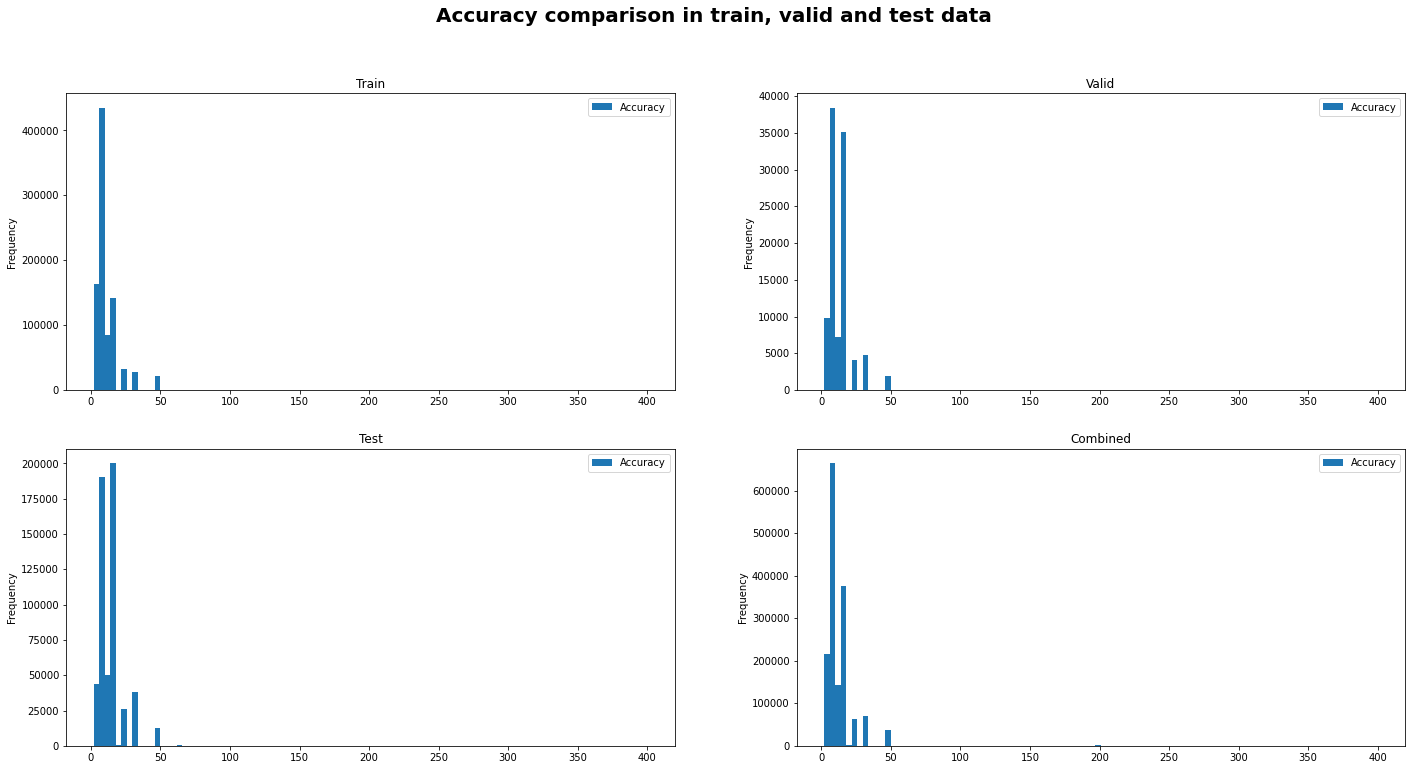

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(24, 12))
fig.suptitle('Accuracy comparison in train, valid and test data', fontweight='bold', fontsize='20')
axes[0, 0].set_title("Train")
axes[0, 1].set_title("Valid")
axes[1, 0].set_title("Test")
axes[1, 1].set_title("Combined")
location_train.plot(ax=axes[0, 0], subplots=True, x='Epoch Time', y=['Accuracy'], kind='hist', bins=100)
location_valid.plot(ax=axes[0, 1], subplots=True, x='Epoch Time', y=['Accuracy'], kind='hist', bins=100)
location_test.plot(ax=axes[1, 0], subplots=True, x='Epoch Time', y=['Accuracy'], kind='hist', bins=100)
location.plot(ax=axes[1, 1], subplots=True, x='Epoch Time', y=['Accuracy'], kind='hist', bins=100)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2819e24410>],
      dtype=object)

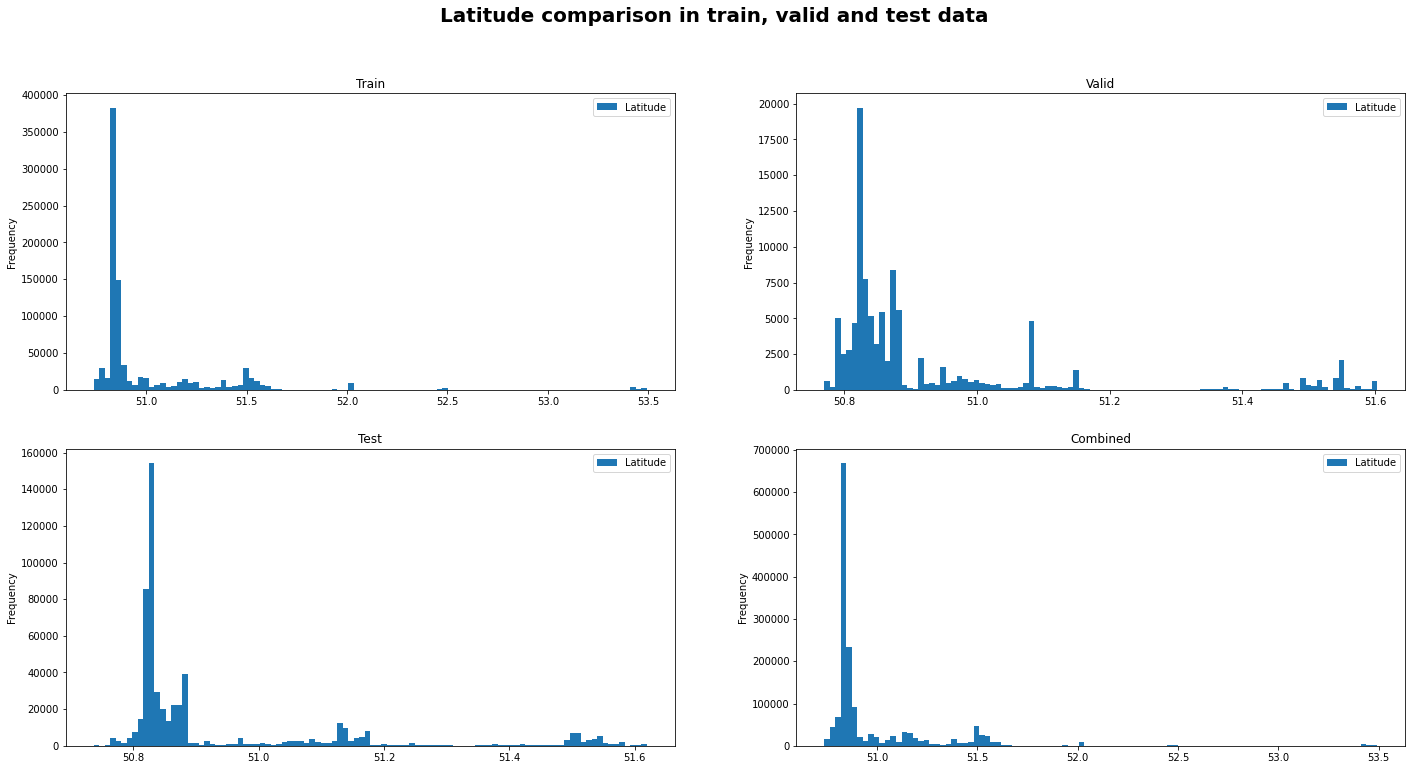

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(24, 12))
fig.suptitle('Latitude comparison in train, valid and test data', fontweight='bold', fontsize='20')
axes[0, 0].set_title("Train")
axes[0, 1].set_title("Valid")
axes[1, 0].set_title("Test")
axes[1, 1].set_title("Combined")
location_train.plot(ax=axes[0, 0], subplots=True, x='Epoch Time', y=['Latitude'], kind='hist', bins=100)
location_valid.plot(ax=axes[0, 1], subplots=True, x='Epoch Time', y=['Latitude'], kind='hist', bins=100)
location_test.plot(ax=axes[1, 0], subplots=True, x='Epoch Time', y=['Latitude'], kind='hist', bins=100)
location.plot(ax=axes[1, 1], subplots=True, x='Epoch Time', y=['Latitude'], kind='hist', bins=100)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f28197cbbd0>],
      dtype=object)

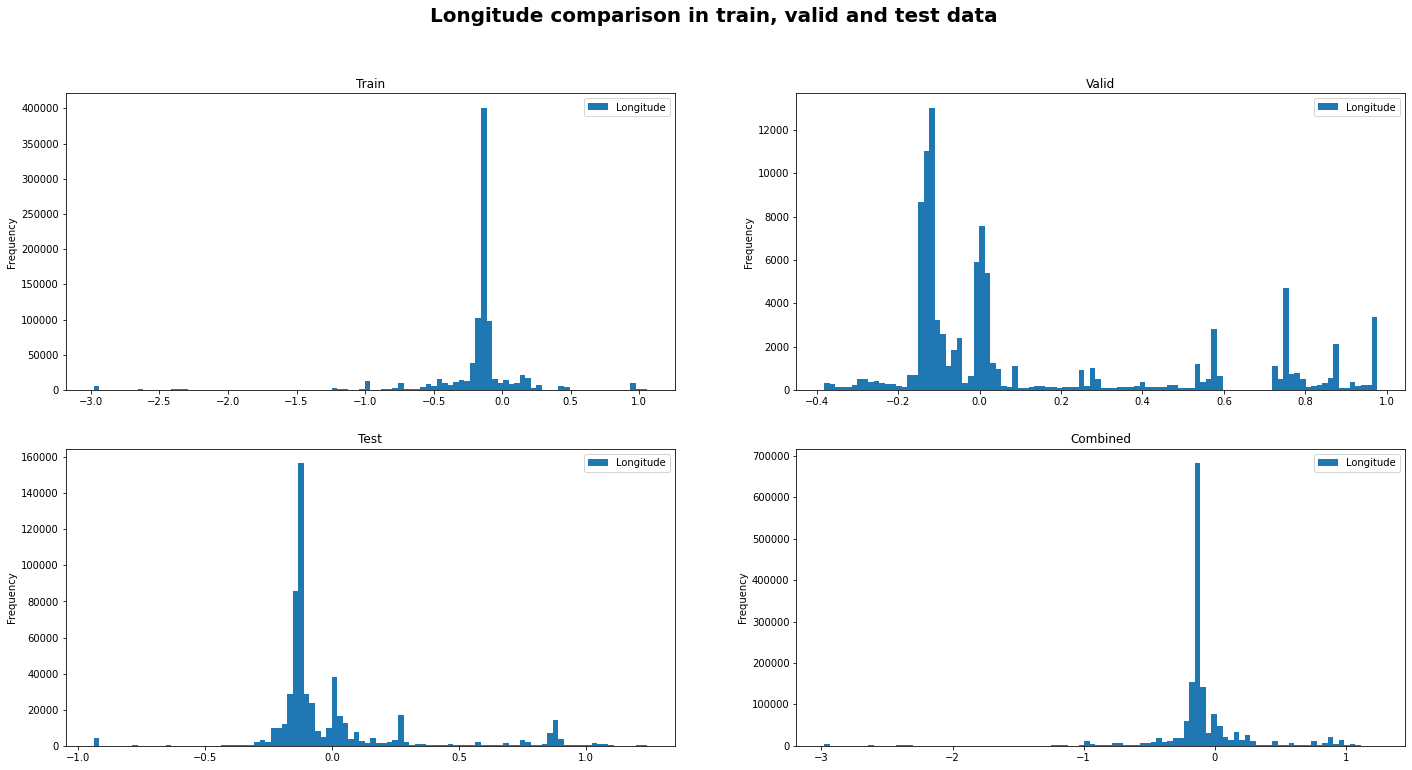

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(24, 12))
fig.suptitle('Longitude comparison in train, valid and test data', fontweight='bold', fontsize='20')
axes[0, 0].set_title("Train")
axes[0, 1].set_title("Valid")
axes[1, 0].set_title("Test")
axes[1, 1].set_title("Combined")
location_train.plot(ax=axes[0, 0], subplots=True, x='Epoch Time', y=['Longitude'], kind='hist', bins=100)
location_valid.plot(ax=axes[0, 1], subplots=True, x='Epoch Time', y=['Longitude'], kind='hist', bins=100)
location_test.plot(ax=axes[1, 0], subplots=True, x='Epoch Time', y=['Longitude'], kind='hist', bins=100)
location.plot(ax=axes[1, 1], subplots=True, x='Epoch Time', y=['Longitude'], kind='hist', bins=100)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f28191aa710>],
      dtype=object)

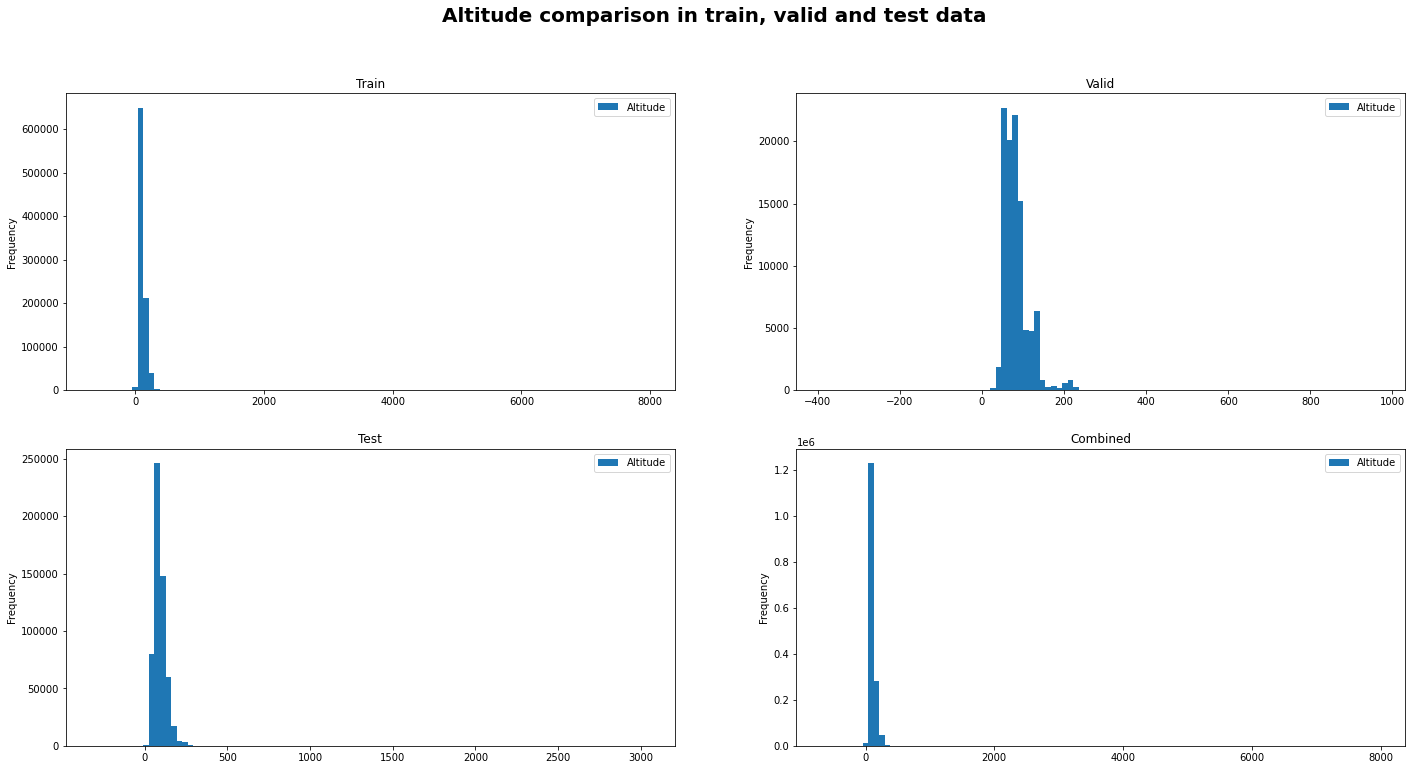

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(24, 12))
fig.suptitle('Altitude comparison in train, valid and test data', fontweight='bold', fontsize='20')
axes[0, 0].set_title("Train")
axes[0, 1].set_title("Valid")
axes[1, 0].set_title("Test")
axes[1, 1].set_title("Combined")
location_train.plot(ax=axes[0, 0], subplots=True, x='Epoch Time', y=['Altitude'], kind='hist', bins=100)
location_valid.plot(ax=axes[0, 1], subplots=True, x='Epoch Time', y=['Altitude'], kind='hist', bins=100)
location_test.plot(ax=axes[1, 0], subplots=True, x='Epoch Time', y=['Altitude'], kind='hist', bins=100)
location.plot(ax=axes[1, 1], subplots=True, x='Epoch Time', y=['Altitude'], kind='hist', bins=100)

## GPS Data

In [ ]:
display_side_by_side(gps_train.describe(), gps_valid.describe(), gps_test.describe(), titles=['gps_train', 'gps_valid', 'gps_test'])

,nsatellite
count,1.322749e+06
mean,1.061953e+01
std,6.532183e+00
min,0.000000e+00
25%,4.000000e+00
50%,1.400000e+01
75%,1.600000e+01
max,2.300000e+01
,nsatellite
count,157348.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2818bbf6d0>],
      dtype=object)

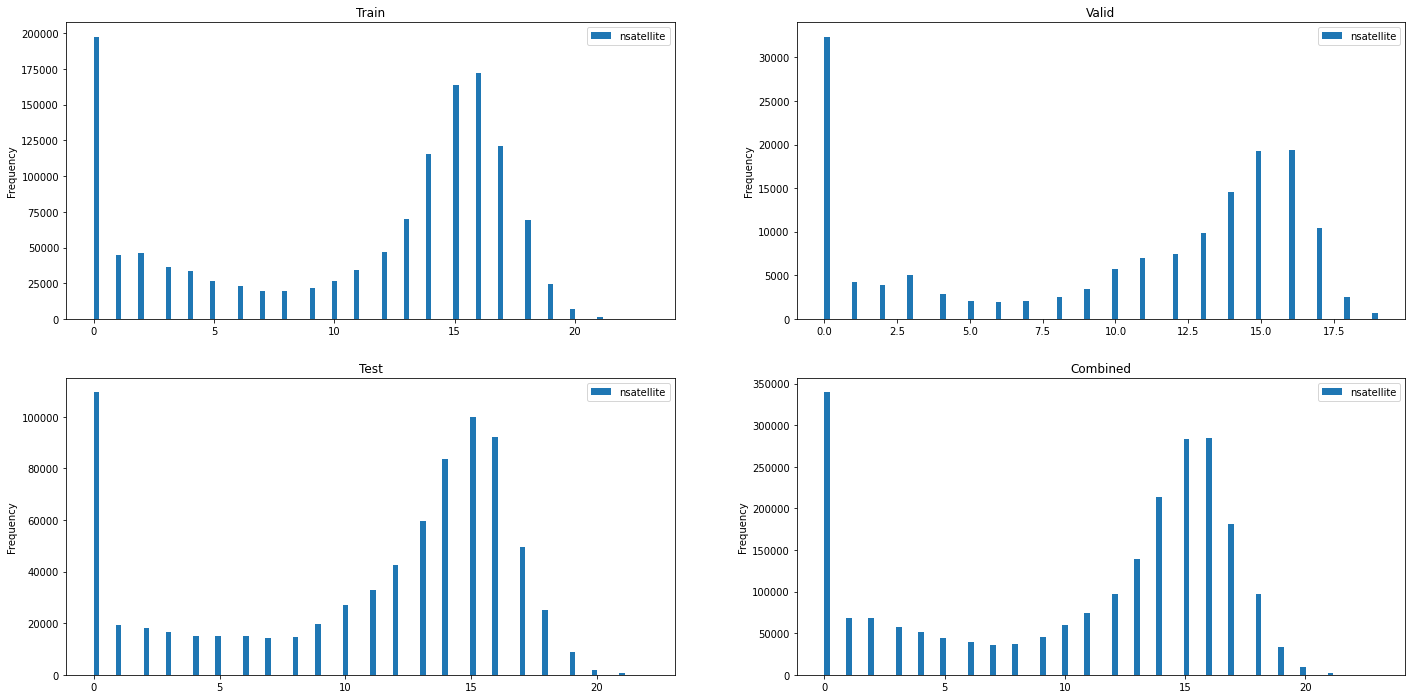

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(24, 12))
axes[0, 0].set_title("Train")
axes[0, 1].set_title("Valid")
axes[1, 0].set_title("Test")
axes[1, 1].set_title("Combined")
gps_train.plot(ax=axes[0, 0], subplots=True, x='Epoch Time', y=['nsatellite'], kind='hist', bins=100)
gps_valid.plot(ax=axes[0, 1], subplots=True, x='Epoch Time', y=['nsatellite'], kind='hist', bins=100)
gps_test.plot(ax=axes[1, 0], subplots=True, x='Epoch Time', y=['nsatellite'], kind='hist', bins=100)
gps.plot(ax=axes[1, 1], subplots=True, x='Epoch Time', y=['nsatellite'], kind='hist', bins=100)

## WiFi Data

In [ ]:
display_side_by_side(wifi_train.describe(), wifi_valid.describe(), wifi_test.describe(), titles=['wifi_train', 'wifi_valid', 'wifi_test'])

,nwifi
count,1.459351e+06
mean,8.636808e+00
std,1.332486e+01
min,0.000000e+00
25%,0.000000e+00
50%,5.000000e+00
75%,1.000000e+01
max,1.330000e+02
,nwifi
count,158681.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f28184f8b50>],
      dtype=object)

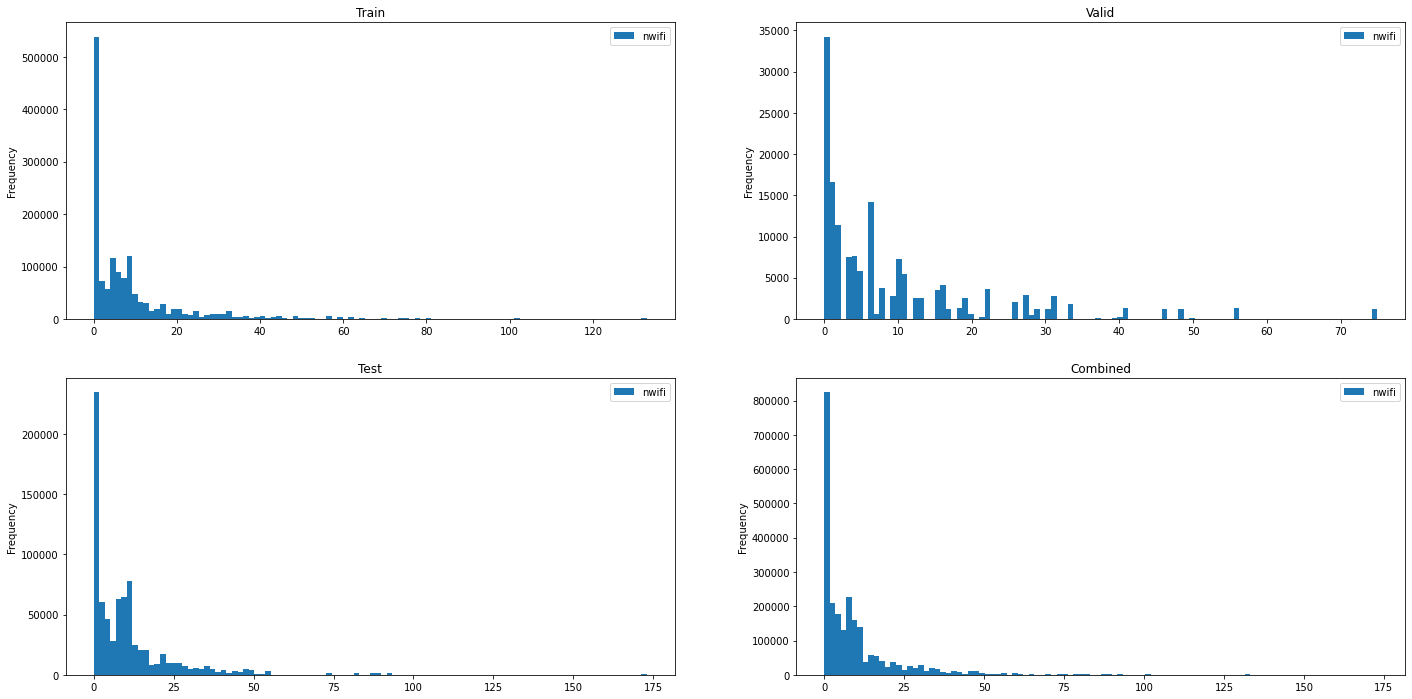

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(24, 12))
axes[0, 0].set_title("Train")
axes[0, 1].set_title("Valid")
axes[1, 0].set_title("Test")
axes[1, 1].set_title("Combined")
wifi_train.plot(ax=axes[0, 0], subplots=True, x='Epoch Time', y=['nwifi'], kind='hist', bins=100)
wifi_valid.plot(ax=axes[0, 1], subplots=True, x='Epoch Time', y=['nwifi'], kind='hist', bins=100)
wifi_test.plot(ax=axes[1, 0], subplots=True, x='Epoch Time', y=['nwifi'], kind='hist', bins=100)
wifi.plot(ax=axes[1, 1], subplots=True, x='Epoch Time', y=['nwifi'], kind='hist', bins=100)

## Cell Data

In [ ]:
display_side_by_side(cell_train.describe(), cell_valid.describe(), cell_test.describe(), titles=['cell_train', 'cell_valid', 'cell_test'])

,ncell
count,1.324881e+06
mean,3.377194e+00
std,2.864164e+00
min,0.000000e+00
25%,2.000000e+00
50%,3.000000e+00
75%,4.000000e+00
max,3.500000e+01
,ncell
count,126333.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2817e9ff10>],
      dtype=object)

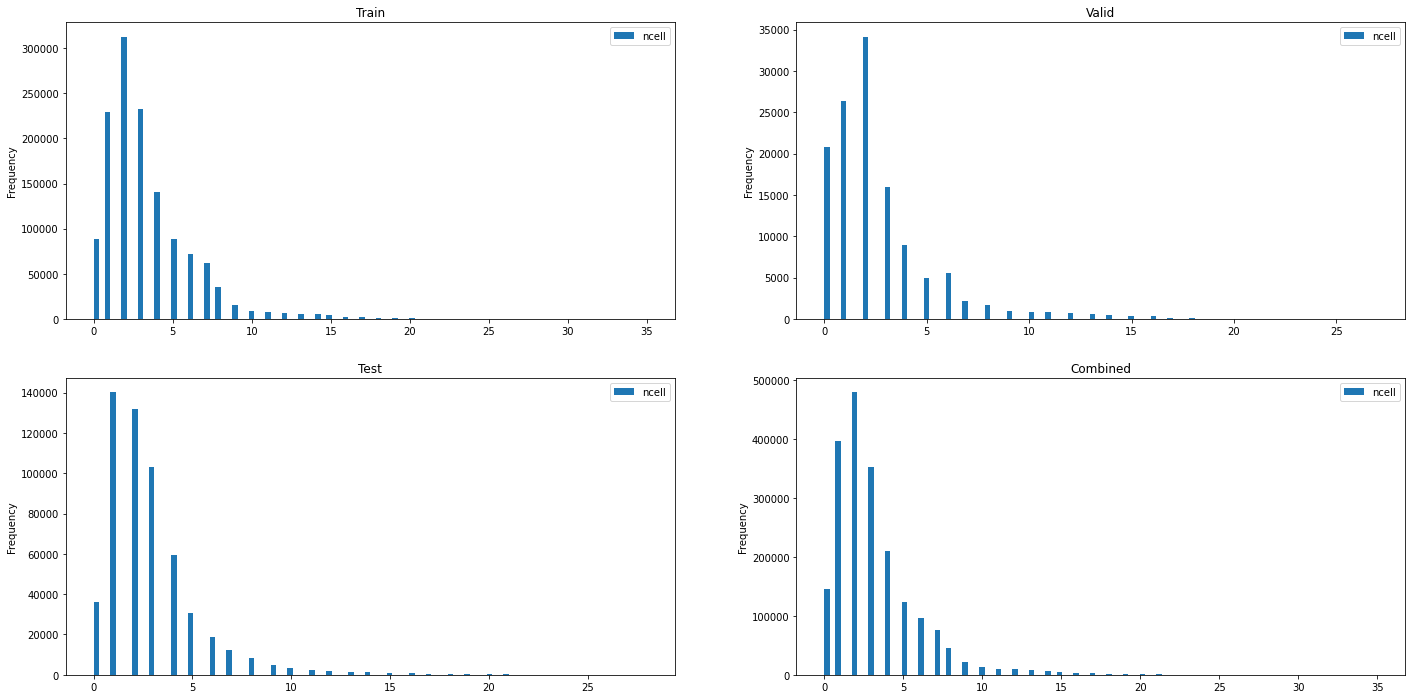

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(24, 12))
axes[0, 0].set_title("Train")
axes[0, 1].set_title("Valid")
axes[1, 0].set_title("Test")
axes[1, 1].set_title("Combined")
cell_train.plot(ax=axes[0, 0], subplots=True, x='Epoch Time', y=['ncell'], kind='hist', bins=100)
cell_valid.plot(ax=axes[0, 1], subplots=True, x='Epoch Time', y=['ncell'], kind='hist', bins=100)
cell_test.plot(ax=axes[1, 0], subplots=True, x='Epoch Time', y=['ncell'], kind='hist', bins=100)
cell.plot(ax=axes[1, 1], subplots=True, x='Epoch Time', y=['ncell'], kind='hist', bins=100)

## Label Data

In [ ]:
display_side_by_side(label_train.describe(), label_valid.describe(), titles=['label_train', 'label_valid'])

,Label
count,980527.000000
mean,4.747335
std,2.286206
min,1.000000
25%,3.000000
50%,5.000000
75%,7.000000
max,8.000000
,Label
count,143958.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f28178a7d90>],
      dtype=object)

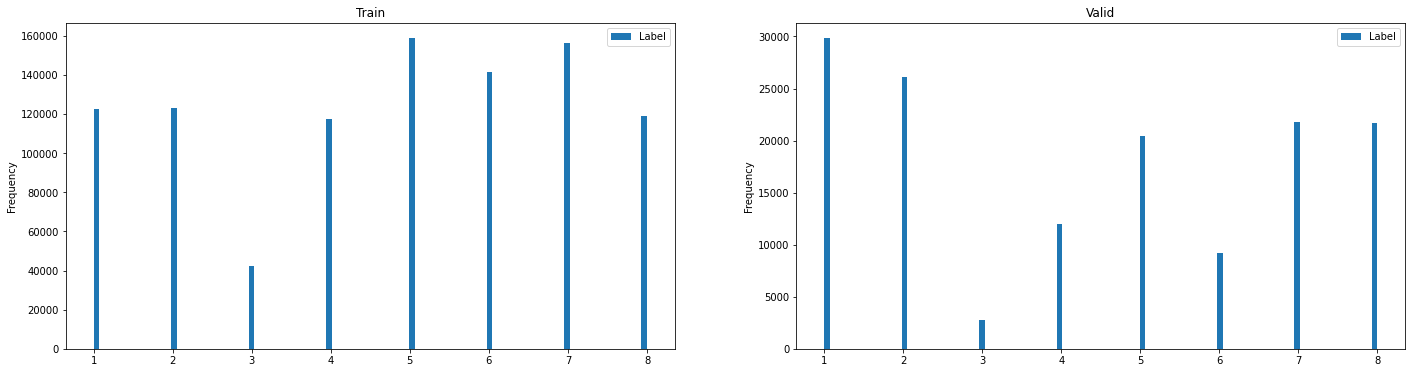

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
axes[0].set_title("Train")
axes[1].set_title("Valid")
label_train.plot(ax=axes[0], subplots=True, x='Epoch Time', y=['Label'], kind='hist', bins=100)
label_valid.plot(ax=axes[1], subplots=True, x='Epoch Time', y=['Label'], kind='hist', bins=100)

# Merge All Data Based on Label Timestamp

In [ ]:
train = pd.merge(label_train, cell_train, on='Epoch Time', how='left')
train = pd.merge(train, wifi_train, on='Epoch Time', how='left')
train = pd.merge(train, gps_train, on='Epoch Time', how='left')
train = pd.merge(train, location_train, on='Epoch Time', how='left')
train.drop_duplicates(subset=['Epoch Time'], keep='first', inplace=True)
train.set_index(train['Epoch Time'], inplace=True)
train = train[['Accuracy', 'Latitude', 'Longitude', 'Altitude', 'nsatellite', 'nwifi', 'ncell', 'Label']]
train.head()

,Accuracy,Latitude,Longitude,Altitude,nsatellite,nwifi,ncell,Label
Epoch Time,,,,,,,,
2017-03-25 08:46:23,NaN,NaN,NaN,NaN,4.0,6.0,NaN,4
2017-03-25 08:46:24,NaN,NaN,NaN,NaN,4.0,6.0,NaN,4
2017-03-25 08:46:25,NaN,NaN,NaN,NaN,4.0,6.0,NaN,4
2017-03-25 08:46:26,NaN,NaN,NaN,NaN,4.0,NaN,NaN,4
2017-03-25 08:46:27,NaN,NaN,NaN,NaN,4.0,6.0,NaN,4


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 980527 entries, 2017-03-25 08:46:23 to 2017-07-05 15:17:32
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Accuracy    660951 non-null  float64
 1   Latitude    660951 non-null  float64
 2   Longitude   660951 non-null  float64
 3   Altitude    660951 non-null  float64
 4   nsatellite  892625 non-null  float64
 5   nwifi       964645 non-null  float64
 6   ncell       866733 non-null  float64
 7   Label       980527 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 67.3 MB


In [ ]:
valid = pd.merge(label_valid, cell_valid, on='Epoch Time', how='left')
valid = pd.merge(valid, wifi_valid, on='Epoch Time', how='left')
valid = pd.merge(valid, gps_valid, on='Epoch Time', how='left')
valid = pd.merge(valid, location_valid, on='Epoch Time', how='left')
valid.drop_duplicates(subset=['Epoch Time'], keep='first', inplace=True)
valid.set_index(valid['Epoch Time'], inplace=True)
valid = valid[['Accuracy', 'Latitude', 'Longitude', 'Altitude', 'nsatellite', 'nwifi', 'ncell', 'Label']]
valid.head()

,Accuracy,Latitude,Longitude,Altitude,nsatellite,nwifi,ncell,Label
Epoch Time,,,,,,,,
2017-06-14 08:04:52,6.0,50.826738,-0.119856,134.054522,16.0,11.0,NaN,3
2017-06-14 08:04:53,6.0,50.826746,-0.119839,134.170604,16.0,11.0,NaN,3
2017-06-14 08:04:54,6.0,50.826755,-0.119822,134.297500,16.0,NaN,NaN,3
2017-06-14 08:04:55,6.0,50.826761,-0.119806,134.367085,16.0,11.0,NaN,3
2017-06-14 08:04:56,6.0,50.826762,-0.119792,134.430774,16.0,11.0,NaN,3


In [ ]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128901 entries, 2017-06-14 08:04:52 to 2017-06-14 17:19:19
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Accuracy    77438 non-null   float64
 1   Latitude    77438 non-null   float64
 2   Longitude   77438 non-null   float64
 3   Altitude    77438 non-null   float64
 4   nsatellite  114853 non-null  float64
 5   nwifi       125252 non-null  float64
 6   ncell       98578 non-null   float64
 7   Label       128901 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 8.9 MB


In [ ]:
test = pd.merge(label_idx, cell_test, on='Epoch Time', how='left')
test = pd.merge(test, wifi_test, on='Epoch Time', how='left')
test = pd.merge(test, gps_test, on='Epoch Time', how='left')
test = pd.merge(test, location_test, on='Epoch Time', how='left')
test.drop_duplicates(subset=['Epoch Time'], keep='first', inplace=True)
test.set_index(test['Epoch Time'], inplace=True)
test = test[['Accuracy', 'Latitude', 'Longitude', 'Altitude', 'nsatellite', 'nwifi', 'ncell']]
test.head()

,Accuracy,Latitude,Longitude,Altitude,nsatellite,nwifi,ncell
Epoch Time,,,,,,,
2049-02-13 13:20:46,NaN,NaN,NaN,NaN,2.0,6.0,NaN
2049-02-13 13:20:47,NaN,NaN,NaN,NaN,2.0,6.0,NaN
2049-02-13 13:20:48,NaN,NaN,NaN,NaN,2.0,6.0,NaN
2049-02-13 13:20:49,NaN,NaN,NaN,NaN,3.0,6.0,NaN
2049-02-13 13:20:50,NaN,NaN,NaN,NaN,2.0,6.0,NaN


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 671172 entries, 2049-02-13 13:20:46 to 2080-12-01 22:33:39
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Accuracy    463152 non-null  float64
 1   Latitude    463152 non-null  float64
 2   Longitude   463152 non-null  float64
 3   Altitude    463152 non-null  float64
 4   nsatellite  620434 non-null  float64
 5   nwifi       614844 non-null  float64
 6   ncell       442684 non-null  float64
dtypes: float64(7)
memory usage: 41.0 MB


## Handle NaN Value

In [ ]:
train.fillna(method='ffill', limit=5, axis=0, inplace=True)
train.fillna(method='bfill', limit=5, axis=0, inplace=True)
valid.fillna(method='ffill', limit=5, axis=0, inplace=True)
valid.fillna(method='bfill', limit=5, axis=0, inplace=True)
test.fillna(method='ffill', limit=5, axis=0, inplace=True)
test.fillna(method='bfill', limit=5, axis=0, inplace=True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 980527 entries, 2017-03-25 08:46:23 to 2017-07-05 15:17:32
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Accuracy    678292 non-null  float64
 1   Latitude    678292 non-null  float64
 2   Longitude   678292 non-null  float64
 3   Altitude    678292 non-null  float64
 4   nsatellite  894062 non-null  float64
 5   nwifi       980527 non-null  float64
 6   ncell       882406 non-null  float64
 7   Label       980527 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 67.3 MB


In [ ]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128901 entries, 2017-06-14 08:04:52 to 2017-06-14 17:19:19
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Accuracy    79423 non-null   float64
 1   Latitude    79423 non-null   float64
 2   Longitude   79423 non-null   float64
 3   Altitude    79423 non-null   float64
 4   nsatellite  115010 non-null  float64
 5   nwifi       127313 non-null  float64
 6   ncell       100690 non-null  float64
 7   Label       128901 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 8.9 MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 671172 entries, 2049-02-13 13:20:46 to 2080-12-01 22:33:39
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Accuracy    476679 non-null  float64
 1   Latitude    476679 non-null  float64
 2   Longitude   476679 non-null  float64
 3   Altitude    476679 non-null  float64
 4   nsatellite  622012 non-null  float64
 5   nwifi       624502 non-null  float64
 6   ncell       452854 non-null  float64
dtypes: float64(7)
memory usage: 41.0 MB


In [ ]:
train.isnull().sum().sum() + valid.isnull().sum().sum() + test.isnull().sum().sum()

2829604

In [ ]:
train.isnull().sum().sum() + valid.isnull().sum().sum() + test.isnull().sum().sum()

2700413